In [1]:
import numpy as np
import pandas as pd
import dask.bag as db
import dask.dataframe as dd
from plotnine import *

In [2]:
def group_elapsed(d1, d2):
    delta = d2 - d1
    return delta.days

In [3]:
df = dd.read_csv('Users.csv', usecols=[2,3])
df = df.astype({'CreationDate': 'datetime64', 'LastAccessDate': 'datetime64'})
#df.info()

In [5]:
df['Elapsed']=df.apply(lambda row: group_elapsed(row['CreationDate'],row['LastAccessDate']), axis=1)
df_group=df[df['Elapsed'] > 1].groupby('Elapsed').count().compute()
df_group.head()

C:\ProgramData\Anaconda3\lib\site-packages\dask\dataframe\core.py:3000: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  warnings.warn(msg)


,CreationDate,LastAccessDate
Elapsed,,
2,114802,114802
3,92639,92639
4,81471,81471
5,76475,76475
6,78402,78402


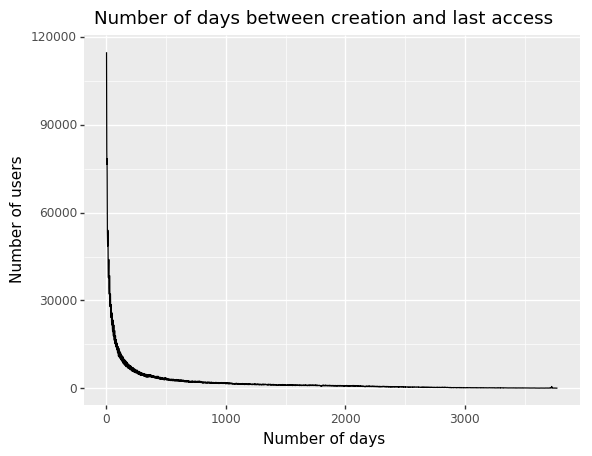

<ggplot: (183130357554)>

In [6]:
plot = ggplot(df_group, aes(x=df_group.index, y='LastAccessDate'))
plot += geom_line()
plot += ggtitle("Number of days between creation and last access")
plot += ylab("Number of users")
plot += xlab("Number of days")
#plot += coord_flip()
plot